## **Instructions**

  Il faut creer un repertoire "packages" puis y placer les fichiers librairies "*.py"

Import des librairies

In [18]:
from packages.data_processing import *
from packages.graphics import *
from packages.data_generation import *
import pandas as pd
import matplotlib.pyplot as plt

# **1. Librairie data_processing**

  Fonctions disponibles :
  - copy_data_from_drive : Copie et decompression des fichiers depuis le drive google
  - load_train           : Chargement des donnees issues du fichier train.csv
  - label_parsing        : Separation nom de l'image / label dans 2 colonnes distinctes
  - one_hot_encoding     : Codage disjonctif des classes
  - get_labels           : Reconstitution d'une description complete des classes depuis une liste de probabilites ou un codage disjonctif

### *copy_data_from_drive*

Copie des donnees depuis le drive.<br>
Renvoie VRAI si l'operation a reussie, FAUX si un probleme (repertoire ou fichier inexistant) a ete rencontre<br>
Les arguments "from_path", "filename" et "to_path" sont disponibles.

Attention : il faut que le drive soit monte au prealable.

In [2]:
if not copy_data_from_drive():
      print("Erreur au chargement des donnees depuis le drive")

Erreur au chargement des donnees depuis le drive


### *load_train*

Chargement du fichier train.csv :<br>
Il est possible de preciser un argument filename, par defaut celui-ci vaut "train.csv"

In [3]:
train = load_train()
train.head(5)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


Parsing image / label<br>
L'instruction dropna a volontairement ete traitee hors fonction car il n'est pas certain que nous voulions supprimer les NA dans la phase de segmentation. La laisser dans la fonction restreint par consequent le champs d'action de la fonction et nous obligera a en creer une nouvelle si besoin.<br>
Il est possible de preciser un argument "sep" stipulant sur quel caractere le split doit etre fait, par defaut celui-ci est a "_"


### *label_parsing*

In [4]:
#Parsing sans suppression des NA restants
df1 = label_parsing(train, drop_na=False)
df1.head(5)

,EncodedPixels,image,label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,NaN,0011165.jpg,Gravel
3,NaN,0011165.jpg,Sugar
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [5]:
#Parsing avec suppression des NA restants
train = label_parsing(train)
train.head(5)

,EncodedPixels,image,label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish
5,1339279 519 1340679 519 1342079 519 1343479 51...,002be4f.jpg,Flower
7,67495 350 68895 350 70295 350 71695 350 73095 ...,002be4f.jpg,Sugar


### *one_hot_encoding*

Codage disjonctif **avec** reinitialisation des indexes

In [6]:
train_encoded = one_hot_encoding(train)
train_encoded.head()

,image,Fish,Flower,Gravel,Sugar
0,0011165.jpg,1,1,0,0
1,002be4f.jpg,1,1,0,1
2,0031ae9.jpg,1,1,0,1
3,0035239.jpg,0,1,1,0
4,003994e.jpg,1,0,1,1


Codage disjonctif **sans** reinitialisation des indexes

In [7]:
train_encoded = one_hot_encoding(train, reset_index=False)
train_encoded.head()

,Fish,Flower,Gravel,Sugar
image,,,,
0011165.jpg,1,1,0,0
002be4f.jpg,1,1,0,1
0031ae9.jpg,1,1,0,1
0035239.jpg,0,1,1,0
003994e.jpg,1,0,1,1


### *get_labels*

Generation d'un label complet correspondant aux valeurs superieures ou egales aux seuils indiques

In [8]:
get_labels([0, 0, 1, 1])

'Gravel,Sugar'

In [9]:
get_labels([0, 1, 1, 0], labels=['classe 1', 'Classe 2', 'Classe 3', 'Classe 4'])

'Classe 2,Classe 3'

In [10]:
get_labels([0.6, 0.9, 0.3, 0.9], threshold=[0.72, 0.87, 0.21, 0.83])

'Flower,Gravel,Sugar'

# **2. Librairie graphics**

  Fonctions disponibles :
  - rleToMask      : Conversion d'un encodage RLE en masque
  - surfaceFromRle : Calcul du nombre de pixels couverts par le masque issu d'un encodage RLE

### *rleToMask*

Generation d'un masque a partir d'un encodage RLE

In [11]:
rle = train.EncodedPixels[0]   #On extrait le premier code RLE du dataset pour l'exemple
mask = rleToMask(rle)   
print("Type du masque de sortie : ", type(mask))         #le masque est un np.array
print("Format du masque de sortie : ", mask.shape)       #Si rien n'est precise, le format en sortie sera 1400*2100

Type du masque de sortie :  <class 'numpy.ndarray'>
Format du masque de sortie :  (1400, 2100)


In [12]:
rle = train.EncodedPixels[0]   #On extrait le premier code RLE du dataset pour l'exemple
mask = rleToMask(rle, (2000, 3000))   
print("Type du masque de sortie : ", type(mask))         #le masque est un np.array
print("Format du masque de sortie : ", mask.shape)       #Si rien n'est precise, le format en sortie sera 1400*2100

Type du masque de sortie :  <class 'numpy.ndarray'>
Format du masque de sortie :  (2000, 3000)


Il ne reste ensuite qu'a afficher ou exploiter le masque.

### *surfaceFromRle*

Renvoie le nombre de pixels couverts par le masque dont on fournit le code RLE.

In [13]:
train = train.reset_index(drop=True)
for i in range(4):
    rle = train.EncodedPixels[i]   #On extrait le premier code RLE du dataset pour l'exemple
    surface = surfaceFromRle(rle) 
    print('Surface du masque ', i, ' : ', surface, ' pixels')

Surface du masque  0  :  932312  pixels
Surface du masque  1  :  1156107  pixels
Surface du masque  2  :  1684325  pixels
Surface du masque  3  :  592697  pixels


### *imshowSuperimposed*

Renvoie un dictionnaire contenant :
* 'Superimposed' : image sur laquelle on superpose sa segmentation colorée en fonction de la classe
* 'Image' : image originale
* 'Segmentation' : masque coloré
* 'Label' : le nom de l'image et la classe

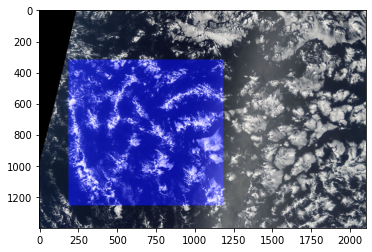

In [20]:
repTrain = 'train_images'
nomImage = train['image'][0]
rle = train['EncodedPixels'][0]
classe = train['label'][0]
dico = imshowSuperimposed(repImage=repTrain, nomImage = nomImage,
                          rle = rle, classe = classe)
plt.imshow(dico['Superimposed']);

# **3. Librairie data_generation**

  Fonctions disponibles :
  - splitValid : Partage d'un set de donnees selon une proportion ou un nombre d'observations
  - makeGen    : Generateur d'images, instanciation d'un objet Keras.ImageDataGenerator

### *splitValid*

Partage d'un set de donnees selon une proportion ou un nombre d'observations

In [16]:
#Ici on split le dataframe train en deux dataframes distincts sur une base 80 / 20
df1, df2 = splitValid(train, randomState = 123, test_size = 0.2, shuffle = True)
print("Nb obs train : ", train.shape)
print("Nb obs df1   : ", df1.shape)
print("Nb obs df2   : ", df2.shape)

Nb obs train :  (11836, 3)
Nb obs df1   :  (9468, 3)
Nb obs df2   :  (2368, 3)


In [23]:
train[['EncodedPixels', 'label']]

,EncodedPixels,label
0,264918 937 266318 937 267718 937 269118 937 27...,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower
2,233813 878 235213 878 236613 878 238010 881 23...,Fish
3,1339279 519 1340679 519 1342079 519 1343479 51...,Flower
4,67495 350 68895 350 70295 350 71695 350 73095 ...,Sugar
...,...,...
11831,1457936 458 1459336 458 1460736 458 1462136 45...,Sugar
11832,12891 428 14291 428 15691 428 17091 428 18491 ...,Sugar
11833,1509467 305 1509773 7 1509782 2 1510867 310 15...,Flower
11834,39728 823 41128 823 42528 823 43928 823 45328 ...,Gravel


In [24]:
#Ici on split le dataframe train en 2 groupes de 2 dataframes X et y, en precisant cette fois le nombre d'observations exact attendu
X_df1, X_df2, y_df1, y_df2 = splitValid(train['image'], train['label'], randomState = 123, test_size = 200, shuffle = True)
print("Nb obs train : ", train.shape)
print("Nb obs df1   : ", X_df1.shape)
print("Nb obs df2   : ", X_df2.shape)

Nb obs train :  (11836, 3)
Nb obs df1   :  (11636,)
Nb obs df2   :  (200,)
